In [20]:
import subprocess

verbose = False

def run_with(n, f, t_le, alpha):
    if f>n:
        raise ValueError("inconsistent input")
    class_path = '"/Users/delaunay/dev/synod/target/classes:/Users/delaunay/.m2/repository/com/typesafe/akka/akka-actor-typed_2.13/2.9.0/akka-actor-typed_2.13-2.9.0.jar:/Users/delaunay/.m2/repository/org/scala-lang/scala-library/2.13.12/scala-library-2.13.12.jar:/Users/delaunay/.m2/repository/com/typesafe/akka/akka-actor_2.13/2.9.0/akka-actor_2.13-2.9.0.jar:/Users/delaunay/.m2/repository/com/typesafe/config/1.4.3/config-1.4.3.jar:/Users/delaunay/.m2/repository/org/scala-lang/modules/scala-java8-compat_2.13/1.0.2/scala-java8-compat_2.13-1.0.2.jar:/Users/delaunay/.m2/repository/com/typesafe/akka/akka-slf4j_2.13/2.9.0/akka-slf4j_2.13-2.9.0.jar:/Users/delaunay/.m2/repository/org/slf4j/slf4j-api/1.7.36/slf4j-api-1.7.36.jar:/Users/delaunay/.m2/repository/ch/qos/logback/logback-classic/1.2.13/logback-classic-1.2.13.jar:/Users/delaunay/.m2/repository/ch/qos/logback/logback-core/1.2.13/logback-core-1.2.13.jar:/Users/delaunay/.m2/repository/org/apache/commons/commons-lang3/3.14.0/commons-lang3-3.14.0.jar"'
    command = f'timeout 60s time -p java -cp {class_path} com.example.synod.Main {n} {f} {t_le} {alpha}'

    while True:
        try:
            output = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT).decode("utf-8")
            break
        except:
            pass


    if verbose:
        print("output=", output)

    words = output.split()
    real_index = words.index('real')
    time = float(words[real_index + 1])

    return time

In [21]:
# Runs

import numpy as np
runs = 10

n_values = [2**i for i in range(1, int(np.log2(64)) + 1)]
t_le_values = [0, 50, 200]
alpha_values = [0.00001, 1]

execution_times = {}

for alpha in alpha_values:
    execution_times[str(alpha)] = {}
    for t_le in t_le_values:
        execution_times[str(alpha)][t_le] = {}
        for n in n_values:
            print(n, t_le, alpha)
            execution_times[str(alpha)][t_le][n] = np.mean([run_with(n, int((n-1)/2), t_le, alpha) for _ in range(runs)])

2 0 1e-05
4 0 1e-05
8 0 1e-05
16 0 1e-05
32 0 1e-05
64 0 1e-05
2 50 1e-05
4 50 1e-05
8 50 1e-05
16 50 1e-05
32 50 1e-05
64 50 1e-05
2 200 1e-05
4 200 1e-05
8 200 1e-05
16 200 1e-05
32 200 1e-05
64 200 1e-05
2 0 1
4 0 1
8 0 1
16 0 1
32 0 1
64 0 1
2 50 1
4 50 1
8 50 1
16 50 1
32 50 1
64 50 1
2 200 1
4 200 1
8 200 1
16 200 1
32 200 1
64 200 1


{'1e-05': {0: {2: 1.088, 4: 1.087, 8: 1.073, 16: 1.056, 32: 1.0859999999999999, 64: 1.478}, 50: {2: 1.006, 4: 1.0210000000000001, 8: 1.2329999999999999, 16: 1.473, 32: 2.261, 64: 4.246}, 200: {2: 1.147, 4: 1.167, 8: 1.326, 16: 1.948, 32: 3.9, 64: 14.237}}, '1': {0: {2: 1.027, 4: 1.036, 8: 1.042, 16: 1.1169999999999998, 32: 1.196, 64: 1.204}, 50: {2: 1.04, 4: 1.0390000000000001, 8: 1.0970000000000002, 16: 1.333, 32: 1.6830000000000003, 64: 2.243}, 200: {2: 1.1439999999999997, 4: 1.145, 8: 1.27, 16: 1.9440000000000002, 32: 3.4309999999999996, 64: 5.087}}}


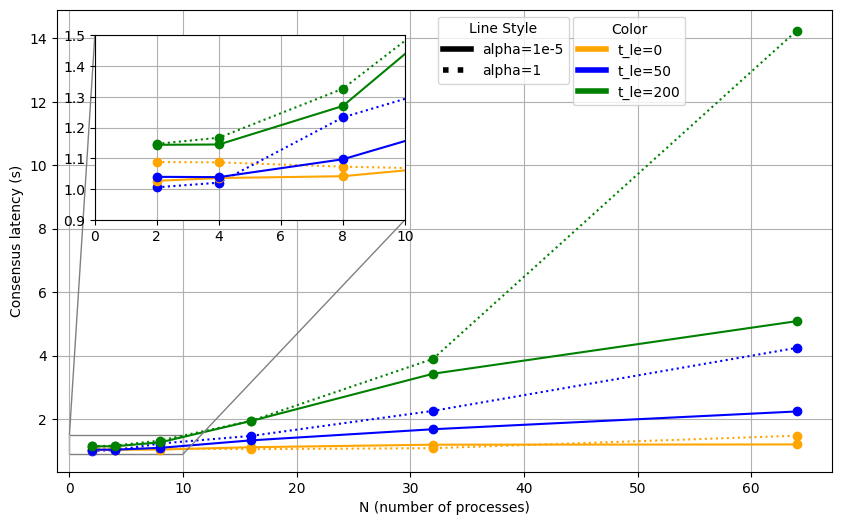

In [77]:
# Plotting

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, ax = plt.subplots(figsize=(10, 6))

print(execution_times)

colors = {0: "orange", 50: "blue", 200: "green"}

ax_inset = inset_axes(ax, width="40%", height="40%", loc=2, bbox_to_anchor=(0.04, -0.04, 1, 1), bbox_transform=ax.transAxes)
ax_inset.set_xlim(0, 10)
ax_inset.set_ylim(0.9, 1.5)

for alpha in alpha_values:
    for t_le in t_le_values:
        if alpha == alpha_values[1]:
            ax.plot(n_values, [execution_times[str(alpha)][t_le][n] for n in n_values], label=f't_le = {t_le} - alpha = {alpha}', marker='o', color=colors[t_le], linestyle="-")
            ax_inset.plot(n_values, [execution_times[str(alpha)][t_le][n] for n in n_values], label=f't_le = {t_le} - alpha = {alpha}', marker='o', color=colors[t_le], linestyle="-")
        else:
            ax.plot(n_values, [execution_times[str(alpha)][t_le][n] for n in n_values], label=f't_le = {t_le} - alpha = {alpha}', marker='o', color=colors[t_le], linestyle=":")
            ax_inset.plot(n_values, [execution_times[str(alpha)][t_le][n] for n in n_values], label=f't_le = {t_le} - alpha = {alpha}', marker='o', color=colors[t_le], linestyle=":")

# Draw lines connecting the main plot and the inset
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

# Create custom handles for colors
color_handles = [
    Line2D([0], [0], color='orange', lw=4),
    Line2D([0], [0], color='blue', lw=4),
    Line2D([0], [0], color='green', lw=4)
]
color_labels = ['t_le=0', 't_le=50', 't_le=200']

# Create custom handles for line styles
line_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=4),
    Line2D([0], [0], color='black', linestyle=':', lw=4),
]
line_labels = ['alpha=1e-5', 'alpha=1']

color_legend = ax.legend(handles=color_handles, labels=color_labels, loc='upper right', title="Color", bbox_to_anchor=(-0.18, 0, 1, 1), bbox_transform=ax.transAxes)
ax.add_artist(color_legend)
ax.legend(handles=line_handles, labels=line_labels, loc='upper right', title="Line Style", bbox_to_anchor=(-0.33, 0, 1, 1), bbox_transform=ax.transAxes)


ax.set_xlabel('N (number of processes)')
ax.set_ylabel('Consensus latency (s)')
ax.grid(True)
ax_inset.grid(True)
plt.show()